In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import csv
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("data.csv",low_memory = False)
df

,Date,Station,Source,Depth,YSI_Depth,YSI_Temp,YSI_Salinity,YSI_DO,YSI_Turbidity,YSI_Chl,...,CtoN,DOC,DIC,NO3/NO2,NH4,DIN,TDN,DON,PO4,SiO2
0,2000/1/6,0,IMS,2,4.000,10.93,0.10,9.36,-7777.0,-7777.0,...,6.90,441.8,-7777.000000,779.296051,57.007864,836.303915,1320.963257,485.0,-9999.00000,96.903763
1,2000/1/6,0,IMS,1,0.100,11.15,0.10,9.64,-7777.0,-7777.0,...,5.46,439.4,4.870467,776.528748,59.663273,836.192021,1314.189941,478.0,-9999.00000,93.920674
2,2000/1/6,10,IMS,2,3.000,10.59,0.10,9.50,-7777.0,-7777.0,...,8.01,-7777.0,-7777.000000,769.291901,66.964248,836.256149,-7777.000000,-2222.0,-9999.00000,98.343296
3,2000/1/6,10,IMS,1,0.100,10.97,0.10,9.74,-7777.0,-7777.0,...,7.40,-7777.0,5.074685,775.346496,65.562847,840.909343,-7777.000000,-2222.0,-9999.00000,95.093953
4,2000/1/6,20,IMS,2,2.500,10.54,0.10,9.75,-7777.0,-7777.0,...,7.11,-7777.0,-7777.000000,778.716033,75.779327,854.495360,1342.243408,488.0,4.62645,115.384312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,2019/7/9,140,IMS,2,5.080,28.28,24.87,0.71,2.5,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9963,2019/7/9,160,IMS,1,0.300,28.69,16.41,6.93,1.2,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9964,2019/7/9,160,IMS,2,7.022,28.27,27.31,0.86,5.6,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9965,2019/7/9,180,IMS,1,0.373,28.62,17.90,6.44,0.7,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#df = df.replace(np.nan,-1)
df = df.replace("#REF!",np.nan)
df = df.replace(" ",np.nan)
df = df.replace('#DIV/0!',np.nan)
df = df.replace('#VALUE!',np.nan)
for i in range(1,9):
    df = df.replace(i*(-1111),np.nan)
df = df.replace(-9999,0)
df

,Date,Station,Source,Depth,YSI_Depth,YSI_Temp,YSI_Salinity,YSI_DO,YSI_Turbidity,YSI_Chl,...,CtoN,DOC,DIC,NO3/NO2,NH4,DIN,TDN,DON,PO4,SiO2
0,2000/1/6,0,IMS,2,4.000,10.93,0.10,9.36,NaN,NaN,...,6.90,441.8,NaN,779.296051,57.007864,836.303915,1320.963257,485.0,0.00000,96.903763
1,2000/1/6,0,IMS,1,0.100,11.15,0.10,9.64,NaN,NaN,...,5.46,439.4,4.870467,776.528748,59.663273,836.192021,1314.189941,478.0,0.00000,93.920674
2,2000/1/6,10,IMS,2,3.000,10.59,0.10,9.50,NaN,NaN,...,8.01,NaN,NaN,769.291901,66.964248,836.256149,NaN,NaN,0.00000,98.343296
3,2000/1/6,10,IMS,1,0.100,10.97,0.10,9.74,NaN,NaN,...,7.40,NaN,5.074685,775.346496,65.562847,840.909343,NaN,NaN,0.00000,95.093953
4,2000/1/6,20,IMS,2,2.500,10.54,0.10,9.75,NaN,NaN,...,7.11,NaN,NaN,778.716033,75.779327,854.495360,1342.243408,488.0,4.62645,115.384312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,2019/7/9,140,IMS,2,5.080,28.28,24.87,0.71,2.5,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9963,2019/7/9,160,IMS,1,0.300,28.69,16.41,6.93,1.2,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9964,2019/7/9,160,IMS,2,7.022,28.27,27.31,0.86,5.6,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9965,2019/7/9,180,IMS,1,0.373,28.62,17.90,6.44,0.7,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = df.iloc[:,[0,1,3,7]]
data.Date = pd.to_datetime(data.Date,format='%Y/%m/%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9967 entries, 0 to 9966
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     9967 non-null   datetime64[ns]
 1   Station  9967 non-null   object        
 2   Depth    9967 non-null   object        
 3   YSI_DO   9896 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 311.6+ KB


In [5]:
data = data.drop(data[data['Station']=='Neuse River at Kinston'].index)
data = data.drop(data[data['Station']=='Streets Ferry Bridge'].index)
data = data.drop(data[data['Station']=='Fisher Landing'].index)
data = data.drop(data[data['Station']=='Camp Seafarer'].index)
data = data.drop(data[data['Station']=='Union Point Neuse'].index)
data = data.drop(data[data['Station']=='Union Point Trent'].index)
data = data.drop(data[data['Station']=='4'].index)
data = data.drop(data[data['Station']=='95'].index)
data = data.drop(data[data['Station']=='96'].index)
data = data.drop(data[data['Station']=='165'].index)
data = data.drop(data[data['Station']=='10'].index)
data = data.drop(data[data['Station']=='130'].index)

data['Depth'].replace(['21D', '11D'], ['2', '1'],inplace=True)
data.drop(index=data[data['Depth']=='1.0 m'].index[0],inplace=True)


In [6]:
import datetime as dt
discharge_data = pd.read_excel('RiverDischarge1974_2020_revised_final.xlsx')
discharge_data.Date = pd.to_datetime(discharge_data['Date'], format='%m/%d/%Y')
# discharge_data['Date'] = discharge_data['Date'].apply(lambda x: dt.datetime.strftime(x,'%Y/%#m/%#d'))
discharge_data.Date

0      2000-01-01
1      2000-01-02
2      2000-01-03
3      2000-01-04
4      2000-01-05
          ...    
7295   2019-12-22
7296   2019-12-23
7297   2019-12-24
7298   2019-12-25
7299   2019-12-26
Name: Date, Length: 7300, dtype: datetime64[ns]

In [7]:
data = pd.merge(data,discharge_data,how='left',on='Date')

data = data.replace("#REF!",np.nan)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          9652 non-null   datetime64[ns]
 1   Station       9652 non-null   object        
 2   Depth         9652 non-null   object        
 3   YSI_DO        9590 non-null   float64       
 4   flow (cfs)    9652 non-null   float64       
 5   ACC_FLOW_7    9652 non-null   float64       
 6   ACC_FLOW_14   9652 non-null   float64       
 7   ACC_FLOW_30   9652 non-null   float64       
 8   ACC_FLOW_40   9652 non-null   float64       
 9   ACC_FLOW_50   9652 non-null   float64       
 10  ACC_FLOW_60   9652 non-null   float64       
 11  ACC_FLOW_70   9652 non-null   float64       
 12  ACC_FLOW_80   9652 non-null   float64       
 13  ACC_FLOW_90   9652 non-null   float64       
 14  ACC_FLOW_180  9652 non-null   float64       
 15  ACC_FLOW_365  9652 non-null   float64 

In [8]:
data.ACC_FLOW_14 = data.ACC_FLOW_14.astype(float)
data.ACC_FLOW_40 = data.ACC_FLOW_40.astype(float)
data.ACC_FLOW_50 = data.ACC_FLOW_50.astype(float)
data.ACC_FLOW_60 = data.ACC_FLOW_60.astype(float)
data.ACC_FLOW_70 = data.ACC_FLOW_70.astype(float)
data.ACC_FLOW_80 = data.ACC_FLOW_80.astype(float)
data.ACC_FLOW_90 = data.ACC_FLOW_90.astype(float)
data.ACC_FLOW_180 = data.ACC_FLOW_180.astype(float)
data.head(50)

,Date,Station,Depth,YSI_DO,flow (cfs),ACC_FLOW_7,ACC_FLOW_14,ACC_FLOW_30,ACC_FLOW_40,ACC_FLOW_50,ACC_FLOW_60,ACC_FLOW_70,ACC_FLOW_80,ACC_FLOW_90,ACC_FLOW_180,ACC_FLOW_365
0,2000-01-06,0,2,9.36,2090.0,15390.0,40900.0,82680.0,109530.0,143480.0,230720.0,369370.0,585770.0,766970.0,1862169.0,2527527.0
1,2000-01-06,0,1,9.64,2090.0,15390.0,40900.0,82680.0,109530.0,143480.0,230720.0,369370.0,585770.0,766970.0,1862169.0,2527527.0
2,2000-01-06,20,2,9.75,2090.0,15390.0,40900.0,82680.0,109530.0,143480.0,230720.0,369370.0,585770.0,766970.0,1862169.0,2527527.0
3,2000-01-06,20,1,10.21,2090.0,15390.0,40900.0,82680.0,109530.0,143480.0,230720.0,369370.0,585770.0,766970.0,1862169.0,2527527.0
4,2000-01-06,30,2,10.08,2090.0,15390.0,40900.0,82680.0,109530.0,143480.0,230720.0,369370.0,585770.0,766970.0,1862169.0,2527527.0
5,2000-01-06,30,1,10.36,2090.0,15390.0,40900.0,82680.0,109530.0,143480.0,230720.0,369370.0,585770.0,766970.0,1862169.0,2527527.0
6,2000-01-06,50,1,10.59,2090.0,15390.0,40900.0,82680.0,109530.0,143480.0,230720.0,369370.0,585770.0,766970.0,1862169.0,2527527.0
7,2000-01-06,50,2,10.19,2090.0,15390.0,40900.0,82680.0,109530.0,143480.0,230720.0,369370.0,585770.0,766970.0,1862169.0,2527527.0
8,2000-01-06,60,2,10.78,2090.0,15390.0,40900.0,82680.0,109530.0,143480.0,230720.0,369370.0,585770.0,766970.0,1862169.0,2527527.0
9,2000-01-06,60,1,11.01,2090.0,15390.0,40900.0,82680.0,109530.0,143480.0,230720.0,369370.0,585770.0,766970.0,1862169.0,2527527.0


<Axes: >

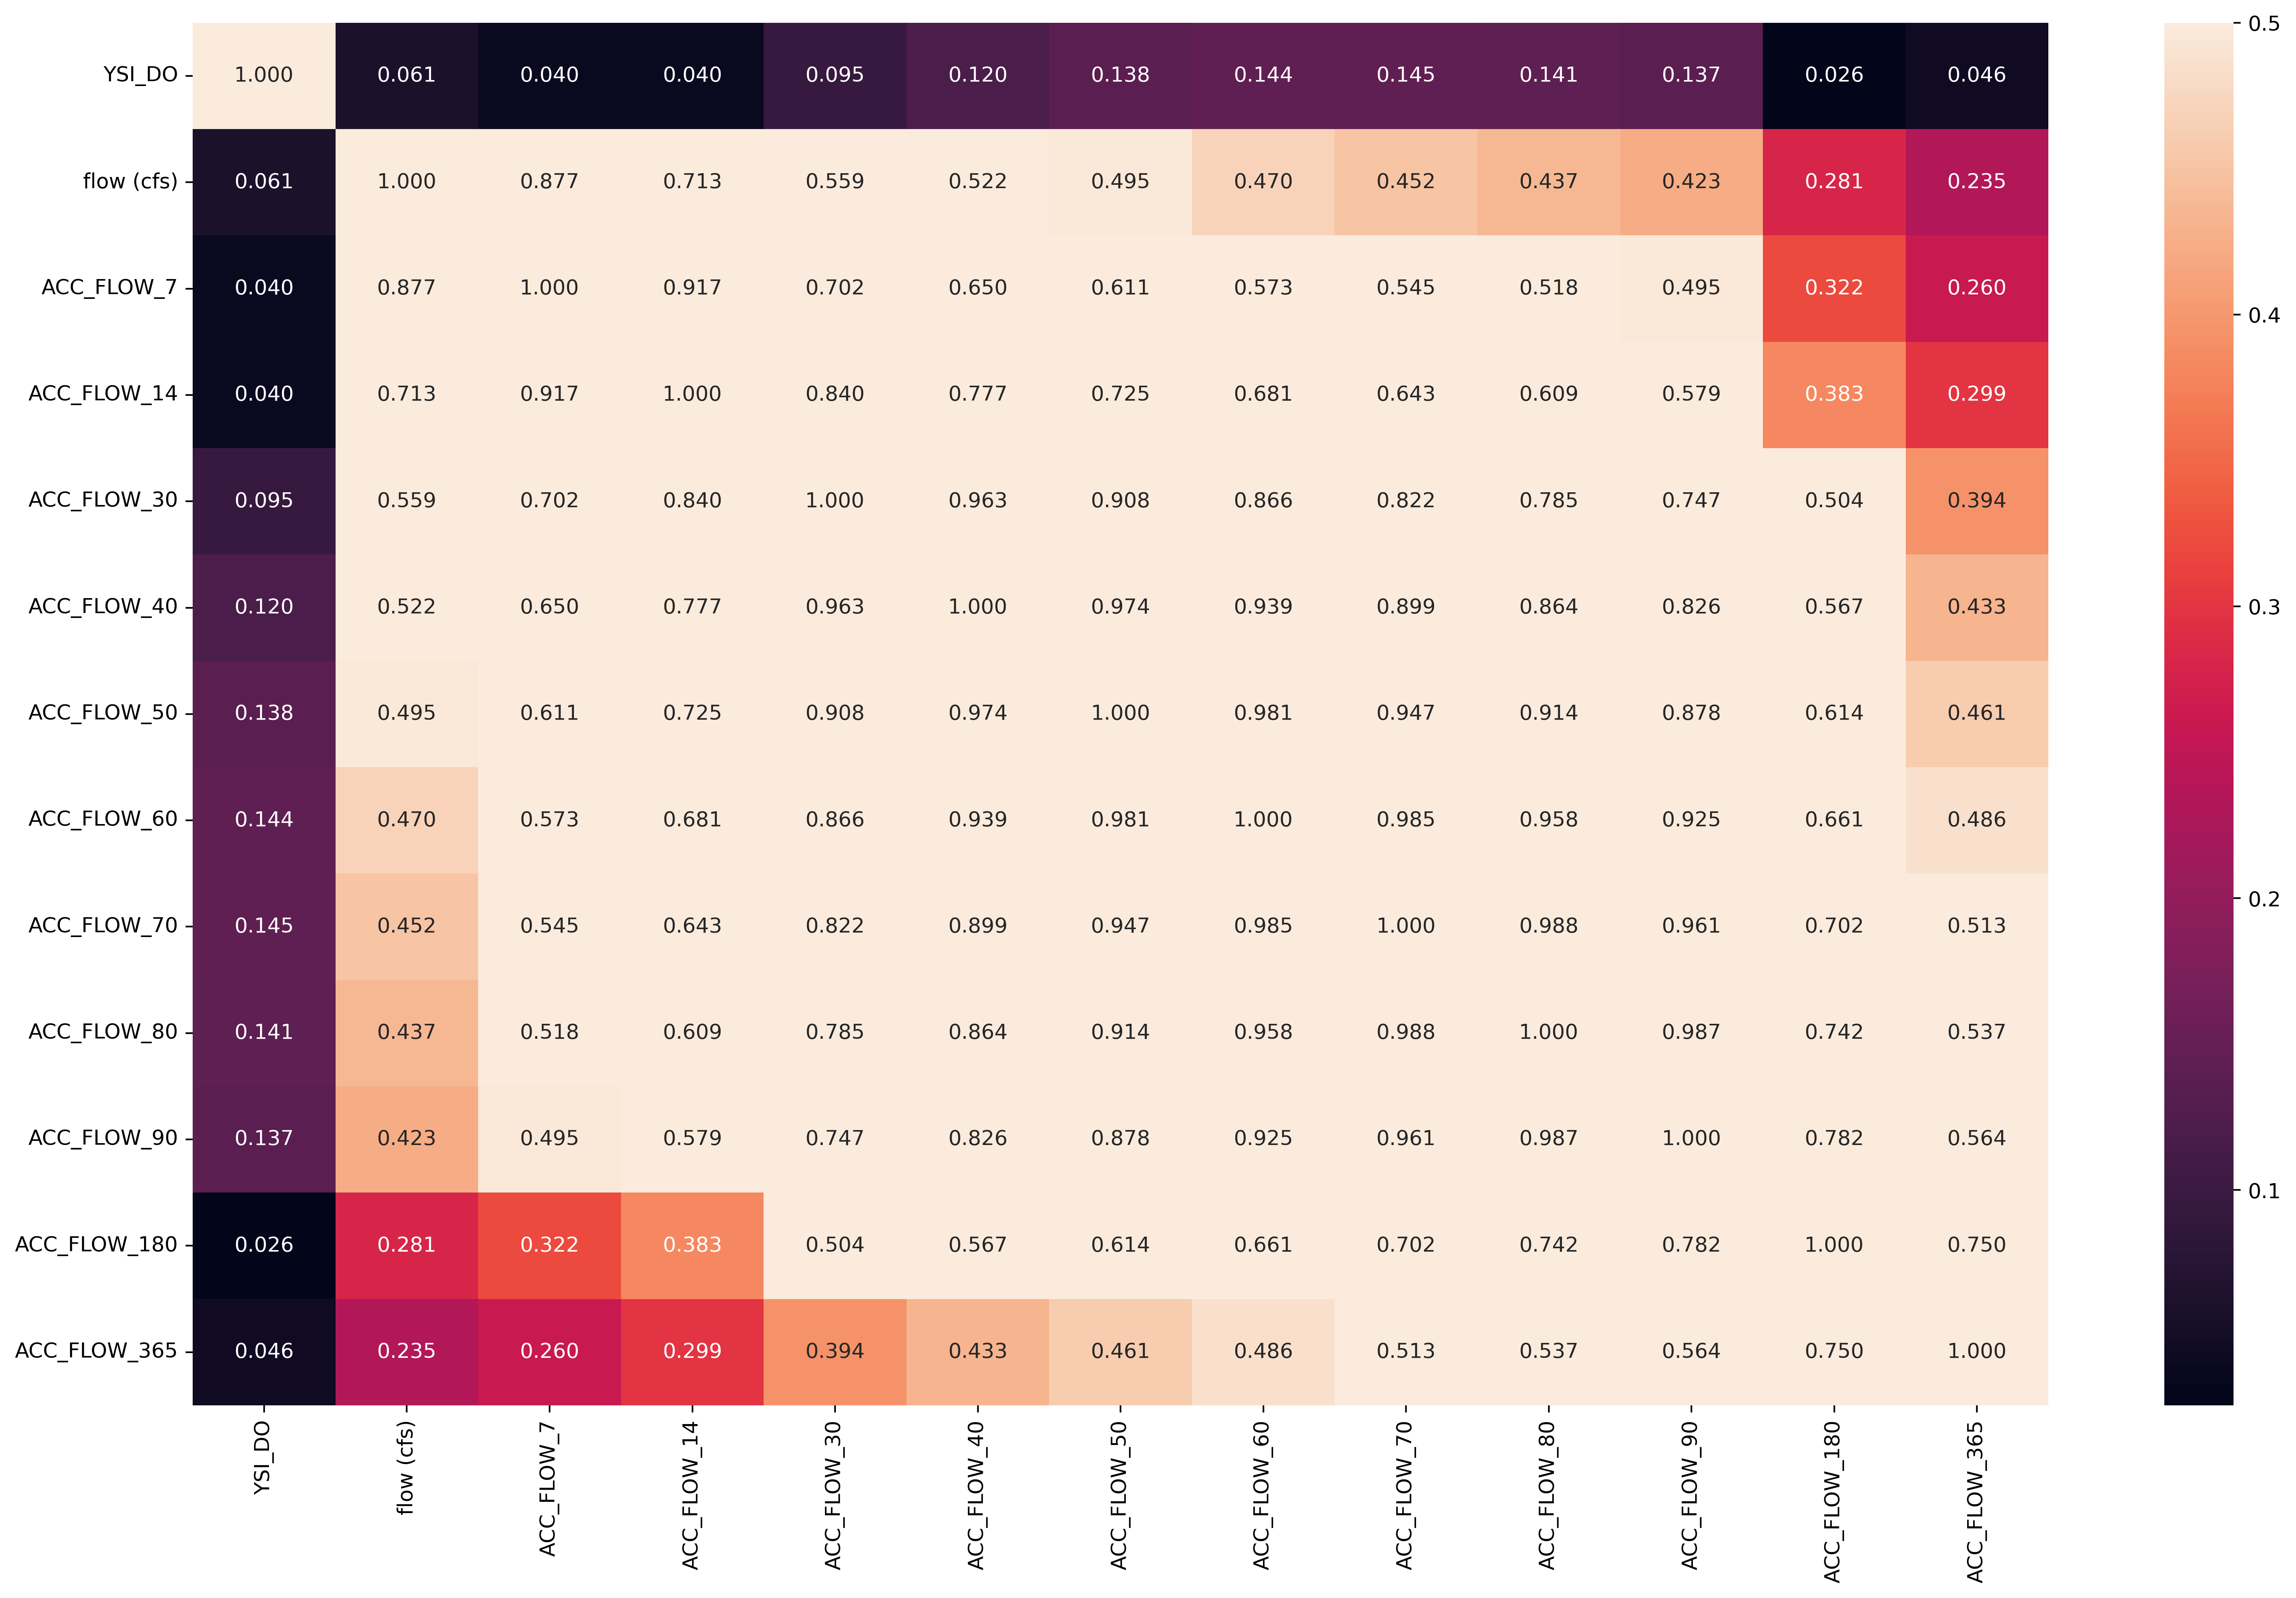

In [9]:
corr_data = data.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15]]

import seaborn as sns
plt.figure(figsize=(20, 12),dpi=400)
sns.heatmap(corr_data.corr(),vmax=0.5,annot=True,fmt='.3f')